Vamos a revisar las tres asunciones de Regresión Lineal:

1. Normalidad de la VR
2. Homocedasticidad
3. Independencia de las VP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import researchpy as rp
import math

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import chi2_contingency


plt.rcParams["figure.figsize"] = (10,8)
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../data/bikes_limpieza_sin_totales.pkl')
df.head(2)

,fecha,estacion,año,mes,festivo,dia,laborable,meteo,temperatura,sensacion_termica,humedad,velo_viento,usu_casuales,usu_registrados
0,2018-01-01,invierno,2018,ene,festivo,lun,no laborable,nublado,14.110847,18.18125,80.5833,10.749882,331,654
1,2018-01-02,invierno,2018,ene,no festivo,mar,laborable,nublado,14.902598,17.68695,69.6087,16.652113,131,670


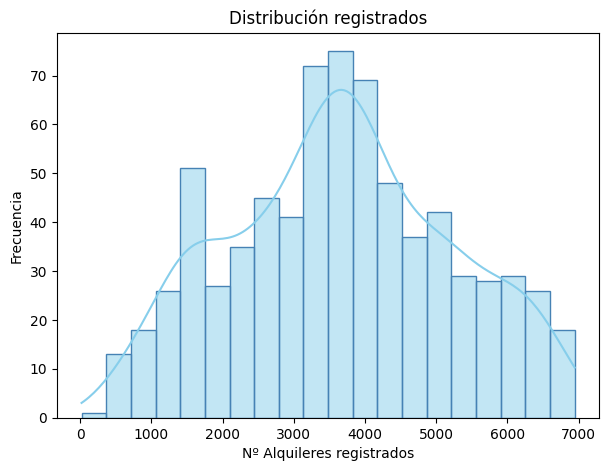

In [3]:
# Vamos a comprobar la distribución de la VR (para comprobar la normalidad de manera visual):

plt.figure(figsize=(7, 5))

sns.histplot(df["usu_registrados"], bins=20,  color="skyblue", edgecolor="steelblue", kde=True)

plt.title("Distribución registrados")
plt.xlabel("Nº Alquileres registrados")
plt.ylabel("Frecuencia");

De manera visual, parece que nuestra VR no es normal. Vamos a comprobarla de manera estadística:

In [4]:
df.shape

(730, 14)

In [5]:
# Como nuestra muestra es menor de 5000 registros, vamos a aplicar Shapiro para comprobar la normalidad de manera estadísica:

stats.shapiro(df["usu_registrados"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

Puesto que pvalue es < que 0.05, confirmamos que, efectivamente, nuestra VR no es normal. Antes de seguir, vamos a intentar normalizarla:

In [6]:
# Vamos a intentarlo con box_cox:

df["usu_registrados_boxcox"], lambda_ajustada = stats.boxcox(df["usu_registrados"])

In [7]:
# Vamos a comprobar si ha funcionado:

stats.shapiro(df["usu_registrados_boxcox"])

ShapiroResult(statistic=0.9854223132133484, pvalue=1.163151068794832e-06)

El boxcox no ha funcionado, la p-value sigue siendo <0.05. Vamos a comprobarlo visualmente también:

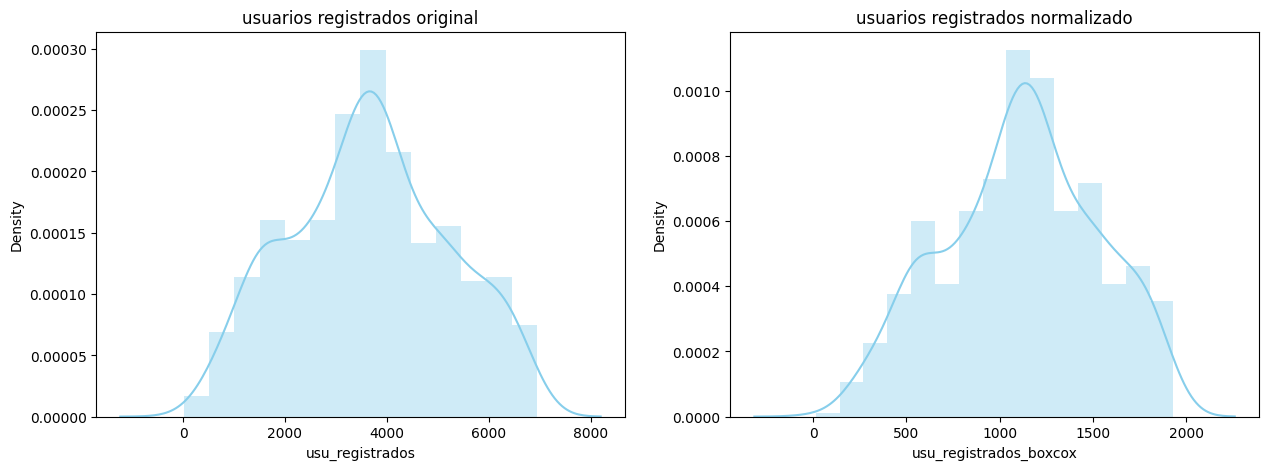

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('usuarios registrados original')
axes[1].set_title('usuarios registrados normalizado')

sns.distplot(df["usu_registrados"] ,ax = axes[0], color="skyblue")
sns.distplot(df["usu_registrados_boxcox"], ax = axes[1], color="skyblue")
plt.savefig("../img/normalizacion_reg.png");

Vamos a intentar normalizar con otro método:

In [9]:
df["usu_registrados_raiz"] = df["usu_registrados"].apply(lambda x: math.sqrt(x))

In [10]:
# Vamos a comprobar si ha funcionado:

stats.shapiro(df["usu_registrados_raiz"])

ShapiroResult(statistic=0.9734112620353699, pvalue=2.976442425861592e-10)

Tampoco ha funcionado. Puesto que no conseguimos normalizar nuestra Variable Respuesta (que es la primera de las asunciones necesarias de Regresión Lineal), vamos a optar por los métodos de predicción Decission Tree y Random Forest.